In [ ]:
#Francisco Lima Cavalcante Filho - 20170018391

!pip install auto-sklearn

# Após a execução desse comando, é necessário reiniciar o ambiente de execução do colab (Ambiente de Execução -> Reiniciar Ambiente de Execução)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 6.7 MB/s 
     |████████████████████████████████| 38.1 MB 11.3 MB/s 
     |████████████████████████████████| 22.3 MB 10.9 MB/s 
     |████████████████████████████████| 1.1 MB 35.9 MB/s 
     |████████████████████████████████| 837 kB 17.1 MB/s 
     |████████████████████████████████| 4.3 MB 40.5 MB/s 
     |████████████████████████████████| 4.0 MB 53.6 MB/s 
     |████████████████████████████████| 260 kB 60.7 MB/s 
     |████████████████████████████████| 596 kB 33.4 MB/s 
     |████████████████████████████████| 140 kB 52.7 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.14.7-py3-none-any.whl size=6602873 sha256=0979a8d329d216106dcf1ccbd15f739772980be0f037fbd1297db5067eb8855f
  Stored in directory: /root/.cache/pip/wheels/ba/43/5c/2fbe6fd19e3af314cbc4aa808378068d8ddd6792064

In [ ]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import cluster, neighbors, svm, metrics, preprocessing
from sklearn import model_selection
from sklearn.cluster import KMeans, AgglomerativeClustering
import autosklearn.classification



df = pd.read_csv('student_prediction.csv', delimiter=",")
df

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [ ]:
df = df.drop(columns=['STUDENTID']) 
# Foi removido a coluna STUDENTID, pois o mesmo não irá interferir na classificação

df

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,1,2,1,2,1,3,3,9,5
141,1,1,2,4,2,2,2,1,4,2,...,1,1,3,2,2,1,5,3,9,5
142,1,1,1,4,2,2,2,1,1,1,...,1,1,3,3,2,1,4,3,9,1
143,2,1,2,4,1,1,1,5,2,3,...,2,1,2,1,2,1,5,3,9,4


In [ ]:
df.duplicated() 

# Verifica se possui valores duplicados

0      False
1      False
2      False
3      False
4      False
       ...  
140    False
141    False
142    False
143    False
144    False
Length: 145, dtype: bool

In [ ]:
df.isnull().sum() 

# Verifica se possui valores faltantes

AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64

Text(0.5, 1.0, 'Outliers')

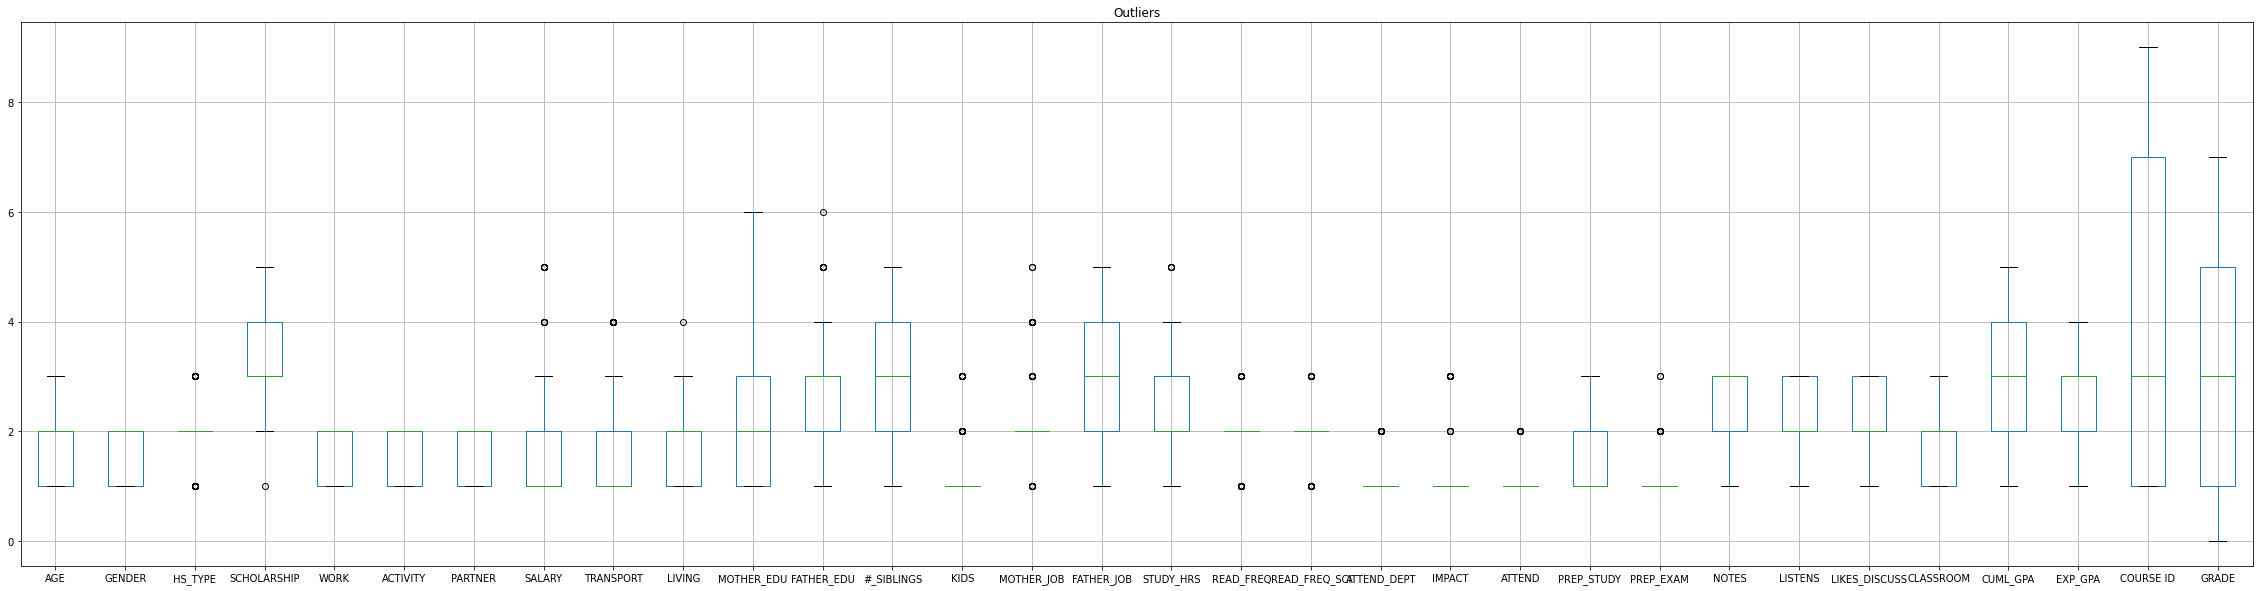

In [ ]:
df.boxplot(grid=True, figsize= (40,10))
plt.title('Outliers', fontsize=12)

# Tabela que indica a presença de Outliers

# Podemos perceber que existem diversos outliers na base de dados, porém todos eles
# possuem valores reais, então eles não serão removidos da base.

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm') 

# Mapa de correlação 

# Podemos perceber que os atributos EXP_GPA e CLASSROOM possuem uma correlação
# de aproximadamente 0.65. Por causa disso iremos realizar, também, teste sem um
# destes atributos. Neste caso, retiraremos o atributo EXP_GPA mais para frente.

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
AGE,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,0.127853,0.001472,-0.199257,-0.068972,-0.070108,0.069748,0.172668,-0.200812,-0.141571,-0.172833,0.059712,0.078849,-0.226882,0.007306,0.060027,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.304994,-0.095251
GENDER,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.022154,-0.013313,-0.154957,0.062370,0.120638,0.060216,-0.028781,-0.056143,-0.033997,-0.067750,0.045206,-0.005233,-0.363971,-0.144138,-0.065795,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,-0.430704,0.335533
HS_TYPE,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.126440,0.023944,-0.018990,-0.166336,-0.134322,0.051827,0.009990,-0.050269,-0.131680,-0.174719,-0.010144,0.050529,-0.009101,0.124317,-0.032180,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,-0.118761,0.104821
SCHOLARSHIP,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,-0.119024,0.028288,0.036543,-0.109006,-0.222776,-0.037831,-0.005450,0.023919,-0.012785,0.003758,0.008877,0.061543,0.214838,0.041443,-0.141190,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.317563,0.023963
WORK,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.118284,0.102223,-0.152641,0.153780,0.205138,-0.134003,-0.165492,-0.044113,0.005919,-0.114824,-0.096332,-0.171384,-0.018640,-0.120973,0.028198,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,-0.114794,0.167445
ACTIVITY,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,0.060922,0.026626,-0.227030,-0.122430,-0.113252,0.143273,-0.057563,-0.161412,0.019123,-0.129342,-0.281283,-0.214557,-0.020602,-0.024023,0.098693,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.326711,-0.062993
PARTNER,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.078556,0.037811,-0.168201,-0.043001,0.045241,0.033182,-0.128034,-0.211091,-0.176901,0.048897,0.090581,-0.004119,0.103634,0.038636,0.154225,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,0.068769,-0.051778
SALARY,0.127853,-0.022154,-0.126440,-0.119024,-0.118284,0.060922,-0.078556,1.000000,-0.015926,0.030177,0.123932,0.031212,0.007866,0.101380,0.028451,-0.109689,-0.097935,-0.072357,0.009390,-0.106800,0.059872,0.111506,0.213079,0.048955,-0.235900,-0.050648,-0.031225,-0.037184,-0.100950,-0.058644,-0.123024,-0.166352
TRANSPORT,0.001472,-0.013313,0.023944,0.028288,0.102223,0.026626,0.037811,-0.015926,1.000000,0.327283,0.168831,0.090659,-0.253099,-0.033565,0.274118,-0.116259,0.007134,-0.046942,-0.124146,0.059791,0.070998,-0.056759,-0.015048,-0.094471,0.022769,-0.019064,-0.134057,-0.158432,-0.036078,0.005909,0.114839,-0.156289
LIVING,-0.199257,-0.154957,-0.018990,0.036543,-0.152641,-0.227030,-0.168201,0.030177,0.327283,1.000000,0.159529,0.206439,-0.276875,-0.059119,0.384892,0.016447,-0.021241,-0.081128,-0.155241,0.179520,0.001039,-0.135860,0.132236,0.009870,0.066609,0.146396,-0.024462,-0.136949,-0.082775,-0.007332,0.271997,0.023683


In [ ]:
plt.boxplot(df['GRADE']) #gráfico de boxplot
plt.title('Boxplot Valores da Nota')

plt.ylabel('Valor')
plt.xlabel('GRADE')


# Podemos ver que os valores máximo e mínimo encontrados da nota são 7 e 0, 
# respectivamente. Observamos também que, de acordo com o gráfico, a mediana é igual
# a 3, ou seja, que aproximadamente metade das amostras possui nota menor ou igual a 3.

In [ ]:
df['GRADE'].value_counts()

# Com isso, podemos observar que as classes estão desbalanceadas

In [ ]:
# Para efetuar o balanceamento da base de dados, decidi fazer um resample na base de dados
# de uma maneira em que possuam 20 amostras para cada valor de nota (GRADE) diferente

from sklearn.utils import resample

nota0 = df[df['GRADE']==0]
nota1 = df[df['GRADE']==1]
nota2 = df[df['GRADE']==2]
nota3 = df[df['GRADE']==3]
nota4 = df[df['GRADE']==4]
nota5 = df[df['GRADE']==5]
nota6 = df[df['GRADE']==6]
nota7 = df[df['GRADE']==7]


resample0 = resample(nota0, replace=True, n_samples=20, random_state=0)
resample1 = resample(nota1, replace=True, n_samples=20, random_state=0)
resample2 = resample(nota2, replace=True, n_samples=20, random_state=0)
resample3 = resample(nota3, replace=True, n_samples=20, random_state=0)
resample4 = resample(nota4, replace=True, n_samples=20, random_state=0)
resample5 = resample(nota5, replace=True, n_samples=20, random_state=0)
resample6 = resample(nota6, replace=True, n_samples=20, random_state=0)
resample7 = resample(nota7, replace=True, n_samples=20, random_state=0)


df = pd.concat([resample0,resample1,resample2,resample3,resample4,resample5,resample6,resample7])

In [ ]:
df['GRADE'].value_counts()

# Com isso, a base de dados está balanceada

In [140]:
X = df.drop(columns=['GRADE'])
y = df['GRADE']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=1)

# Tabela sem o atributo com maior correlação
X_corr = X.drop(columns=['EXP_GPA'])

X_corr_train, X_corr_test, y_corr_train, y_corr_test = model_selection.train_test_split(X, y, random_state=1)


In [141]:
# Algoritmo AUTOML rodando para a base de dados sem retirar atributo

automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=300,
    per_run_time_limit=30,
    disable_evaluator_output=False,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 10},
)
automl.fit(X_train, y_train)

predictions = automl.predict(X_test)
print("Acurácia: ", metrics.accuracy_score(y_test, predictions))


Acurácia:  0.75


In [ ]:
# Algoritmo AUTOML rodando para a base de dados retirando o atributo correlacionado

automl_corr = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=300,
    per_run_time_limit=30,
    disable_evaluator_output=False,
    resampling_strategy='cv',
    resampling_strategy_arguments={'folds': 10},
)
automl_corr.fit(X_corr_train, y_corr_train)

predictions_corr = automl_corr.predict(X_corr_test)
print("Acurácia: ", metrics.accuracy_score(y_corr_test, predictions_corr))

# Podemos ver aqui, que mesmo retirando o atributo com maior correlação da base
# de dados, ainda obtivemos o mesmo valor de acurácia

Acurácia:  0.775


In [ ]:
# Função para verificar qual algoritmo obteve o melhor resultado
# O melhor algoritmo encontrado foi o random_forest

automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
2,1,0.10,random_forest,0.283333,17.039687
20,2,0.02,libsvm_svc,0.300000,8.010175
5,3,0.02,libsvm_svc,0.300000,5.924350
7,4,0.04,libsvm_svc,0.316667,7.700308
15,5,0.04,lda,0.316667,9.277710
10,6,0.02,mlp,0.316667,7.683856
17,7,0.02,libsvm_svc,0.325000,6.527624
11,8,0.02,passive_aggressive,0.341667,11.482292
19,9,0.06,gradient_boosting,0.383333,24.767609


In [ ]:
predictions = automl.predict(X_test)
print("Accuracy score", metrics.accuracy_score(y_test, predictions))

poT = automl.performance_over_time_
poT.plot(
    x='Timestamp',
    kind='line',
    legend=True,
    title='Auto-sklearn accuracy over time',
    grid=True,
)
plt.show()

In [ ]:
# Função para encontrar o modelo utilizado

automl.show_models()

In [ ]:
# Testando o melhor modelo do RandomForestClassifier() obtido

from sklearn.ensemble import RandomForestClassifier

rdm_forest = RandomForestClassifier(max_features=5, n_estimators=512, n_jobs=1,
                           random_state=1, warm_start=True)

rdm_forest.fit(X_train, y_train)

predict = rdm_forest.predict(X_test)
print('Acurácia :', metrics.accuracy_score(y_test, predict))
print("Sensibilidade: %0.2f" % (metrics.recall_score(y_test, predict, average='macro')))
print('Precisão: %0.2f' %(metrics.precision_score(y_test, predict, average='macro')))
print('Matriz de Confusão:')
print(metrics.confusion_matrix(y_test, predict))

# As medidas escolhidas foram a Sensibilidade e a Precisão.

# A sensibilidade corresponde a proporção entre as respostas corretas que o algoritmo
# previu, tanto os verdadeiros positivos quanto os verdadeiros negativos, com a
# soma destes mais os pontos definidos como falso positivos e falsos negativos.

# A precisão corresponde a proporção entre as respostas corretas que o algoritmo 
# previu, porém apenas os verdadeiros positivos, com a soma destes mais os pontos
# definidos como falsos positivos.

# Cada linha da matriz de confusão representa o número de estudantes que tiraram
# a nota correspondente, ou seja, coluna 0 estão os alunos que tiraram nota 0, etc.
# E as colunas representam os casos que a máquina classificou.

# Na diagonal principal da matriz, estão os casos que a máquina classificou corretamente
# Números que não estão presentes na diagonal principal, são os casos que a máquina errou.
# Ou seja, um dos estudantes, a máquina classificou como se a nota dele fosse 0, porém a
# nota correta dele é 4.



Acurácia : 0.8
Sensibilidade: 0.81
Precisão: 0.80
Matriz de Confusão:
[[5 0 0 0 0 0 0 0]
 [0 3 0 0 0 1 0 0]
 [0 1 7 0 0 1 0 0]
 [0 0 0 3 0 0 0 0]
 [1 0 0 1 6 0 0 0]
 [0 0 0 1 0 5 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2 1]]


In [ ]:
# Testando para vários hyperparâmetros

# O parâmetro escolhido para ser mudado foi o n_estimators, que indica o número
# de árvores que serão utilizados no algoritmo

# 1

rdm_forest = RandomForestClassifier(max_features=5, n_estimators=1, n_jobs=1,
                           random_state=1, warm_start=True)

rdm_forest.fit(X_train, y_train)

predict = rdm_forest.predict(X_test)

print('Teste 1')
print('Acurácia :', metrics.accuracy_score(y_test, predict))
print("Sensibilidade: %0.2f" % (metrics.recall_score(y_test, predict, average='macro')))
print('Precisão: %0.2f' %(metrics.precision_score(y_test, predict, average='macro')))
print('Matriz de Confusão:')
print(metrics.confusion_matrix(y_test, predict))
print('')

# 2

rdm_forest = RandomForestClassifier(max_features=5, n_estimators=2, n_jobs=1,
                           random_state=1, warm_start=True)

rdm_forest.fit(X_train, y_train)

predict = rdm_forest.predict(X_test)

print('Teste 2')
print('Acurácia :', metrics.accuracy_score(y_test, predict))
print("Sensibilidade: %0.2f" % (metrics.recall_score(y_test, predict, average='macro')))
print('Precisão: %0.2f' %(metrics.precision_score(y_test, predict, average='macro')))
print('Matriz de Confusão:')
print(metrics.confusion_matrix(y_test, predict))
print('')

# 3

rdm_forest = RandomForestClassifier(max_features=5, n_estimators=10, n_jobs=1,
                           random_state=1)

rdm_forest.fit(X_train, y_train)

predict = rdm_forest.predict(X_test)

print('Teste 3')
print('Acurácia :', metrics.accuracy_score(y_test, predict))
print("Sensibilidade: %0.2f" % (metrics.recall_score(y_test, predict, average='macro')))
print('Precisão: %0.2f' %(metrics.precision_score(y_test, predict, average='macro')))
print('Matriz de Confusão:')
print(metrics.confusion_matrix(y_test, predict))
print('')

# Podemos ver que, ao mudar o n_estimators, os resultados de sensibilidade estão bem parecidos
# e a maior diferença entre os algoritmos, está na precisão apresentada para cada um deles.

Teste 1
Acurácia : 0.725
Sensibilidade: 0.74
Precisão: 0.77
Matriz de Confusão:
[[4 0 1 0 0 0 0 0]
 [0 3 1 0 0 0 0 0]
 [1 0 7 0 0 1 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 0 0 6 2 0 0]
 [0 1 0 2 0 3 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 2 0 0 1]]

Teste 2
Acurácia : 0.7
Sensibilidade: 0.70
Precisão: 0.65
Matriz de Confusão:
[[5 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [1 1 6 0 0 1 0 0]
 [0 0 1 2 0 0 0 0]
 [0 2 0 0 6 0 0 0]
 [0 2 0 1 0 3 0 0]
 [0 0 0 0 0 0 2 0]
 [1 0 0 0 2 0 0 0]]

Teste 3
Acurácia : 0.8
Sensibilidade: 0.82
Precisão: 0.85
Matriz de Confusão:
[[5 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0]
 [0 1 6 1 0 1 0 0]
 [0 0 0 3 0 0 0 0]
 [0 0 1 0 6 1 0 0]
 [0 0 0 1 0 5 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 2 0 1]]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Questão 2

k_values = [5, 7]

for k in k_values:
    print("K =", k)
    kmeans = KMeans(n_clusters = k, random_state=0)
    labels = kmeans.fit_predict(X)
    print("Silhouette:", metrics.silhouette_score(X, labels, metric='euclidean'))

# Podemos observar que os valores obtidos de Silhouette estão bem próximos. Quanto
# mais próximos de 1, mais separados e mais definidos estão os clusters. E quanto mais
# próximos de 0, significa que os clusters estão bem próximos, e possivelmente sobrepostos

K = 5
Silhouette: 0.16596234042298003
K = 7
Silhouette: 0.13286458866267586


In [ ]:
linkages = ['single', 'complete']

for k in k_values:
    print("K =", k)
    for link in linkages:
        ac_model = AgglomerativeClustering(n_clusters=k, linkage=link)
        labels = ac_model.fit_predict(X)
        print(f"Silhouette - {link}:", metrics.silhouette_score(X, labels, metric='euclidean'))

# Podemos observar que o resultado obtido usando o 'complete' foram maiores que usando
# o 'single', ou seja, os clusters obtidos usando o 'complete' estão mais separados e
# definidos.

# Podemos observar que, utilizando o 'single' com K = 7, obtivemos o valor de Silhouette
# negativo, ou seja, os clusters

K = 5
Silhouette - single: 0.013565838255700225
Silhouette - complete: 0.14177028532891298
K = 7
Silhouette - single: -0.002171500535138232
Silhouette - complete: 0.17124699040298677
